**NAME :ABHIJITH P V**

**REGISTER NO: 24MSD7041**

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('SMSSpamCollection.csv')
df.head()

,result,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Label Encoding for result

In [4]:
df['result'] = df['result'].map({'ham': 0, 'spam': 1})

Tokenizing the values

In [5]:
labels = df['result'].values
messages = df['message'].values

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(messages)
sequences = tokenizer.texts_to_sequences(messages)

In [7]:
# Lowercase and simple tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(messages)
sequences = tokenizer.texts_to_sequences(messages)

Padding to make the inputs of same length

In [8]:
max_len = 100
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

Splitting into training and testing data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


Model Compiling with Three Layers

In [10]:
vocab_size = len(tokenizer.word_index) + 1

model_baseline = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model_baseline.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\abhij\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model Training upto 5 epochs

In [11]:
print("\nTraining Baseline Model...")
history_baseline = model_baseline.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Training Baseline Model...
Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.8654 - loss: 0.3995 - val_accuracy: 0.8556 - val_loss: 0.4156
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8686 - loss: 0.3907 - val_accuracy: 0.8556 - val_loss: 0.4142
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.8686 - loss: 0.3902 - val_accuracy: 0.8556 - val_loss: 0.4212
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.8686 - loss: 0.3909 - val_accuracy: 0.8556 - val_loss: 0.4135
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8686 - loss: 0.3909 - val_accuracy: 0.8556 - val_loss: 0.4154


Baseline Model Evaluation

In [12]:
print("\nEvaluating Baseline Model...")
y_pred_baseline = (model_baseline.predict(X_test) > 0.5).astype("int32")
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Model Accuracy: {accuracy_baseline:.4f}")


Evaluating Baseline Model...
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Baseline Model Accuracy: 0.8556


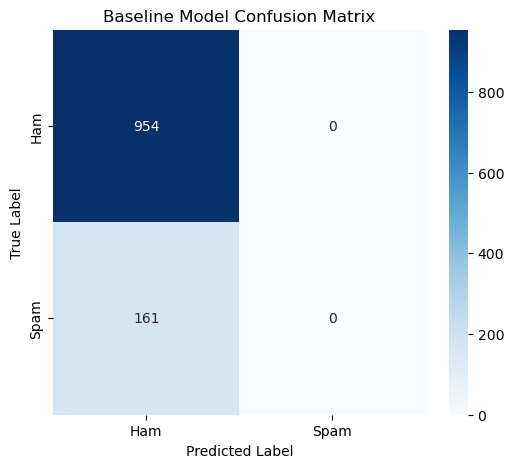

In [13]:
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Baseline Model Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


Adding Dropout to the baseline model

In [14]:
print("\nBuilding and Training Mini-Experiment Model (with Dropout)...")
model_experiment = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    LSTM(64),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_experiment.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_experiment = model_experiment.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Building and Training Mini-Experiment Model (with Dropout)...
Epoch 1/5


C:\Users\abhij\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.8648 - loss: 0.4087 - val_accuracy: 0.8556 - val_loss: 0.4132
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.8686 - loss: 0.3960 - val_accuracy: 0.8556 - val_loss: 0.4153
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8686 - loss: 0.3951 - val_accuracy: 0.8556 - val_loss: 0.4133
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8686 - loss: 0.3927 - val_accuracy: 0.8556 - val_loss: 0.4135
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.8686 - loss: 0.3937 - val_accuracy: 0.8556 - val_loss: 0.4130


Comapritive Evaluation of the Experimental and Baseline Model

In [15]:

print("\nEvaluating Mini-Experiment Model...")
y_pred_experiment = (model_experiment.predict(X_test) > 0.5).astype("int32")
accuracy_experiment = accuracy_score(y_test, y_pred_experiment)
print(f"Mini-Experiment Model Accuracy: {accuracy_experiment:.4f}")

print("\n--- Final Comparison ---")
print(f"Baseline Model Test Accuracy: {accuracy_baseline:.4f}")
print(f"Mini-Experiment Model Test Accuracy: {accuracy_experiment:.4f}")


Evaluating Mini-Experiment Model...
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Mini-Experiment Model Accuracy: 0.8556

--- Final Comparison ---
Baseline Model Test Accuracy: 0.8556
Mini-Experiment Model Test Accuracy: 0.8556


Add On (Setting LSTM to 64 -> 128)

In [16]:
print("Building and Training Mini-Experiment model(with Drop-out)")
model_experiment1 = Sequential([Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len), LSTM(128),Dense(1, activation='sigmoid')])
model_experiment1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_experiment = model_experiment1.fit( X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Building and Training Mini-Experiment model(with Drop-out)
Epoch 1/5


C:\Users\abhij\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.8686 - loss: 0.4006 - val_accuracy: 0.8556 - val_loss: 0.4169
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8686 - loss: 0.3912 - val_accuracy: 0.8556 - val_loss: 0.4163
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.8686 - loss: 0.3904 - val_accuracy: 0.8556 - val_loss: 0.4142
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.8686 - loss: 0.3910 - val_accuracy: 0.8556 - val_loss: 0.4130
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.8686 - loss: 0.3899 - val_accuracy: 0.8556 - val_loss: 0.4139


Evaluation of Add-On

In [17]:
print("\nEvaluating Mini-Experiment Model...")
y_pred_experiment = (model_experiment1.predict(X_test) > 0.5).astype("int32")
accuracy_experiment1 = accuracy_score(y_test, y_pred_experiment)
print(f"Add On Model Accuracy: {accuracy_experiment1:.4f}")
print("\n--- Final Comparison ---")
print(f"Baseline Model Test Accuracy: {accuracy_baseline:.4f}")
print(f"Mini-Experiment Model Test Accuracy: {accuracy_experiment:.4f}")
print(f"Add On Model Test Accuracy: {accuracy_experiment1:.4f}")


Evaluating Mini-Experiment Model...
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Add On Model Accuracy: 0.8556

--- Final Comparison ---
Baseline Model Test Accuracy: 0.8556
Mini-Experiment Model Test Accuracy: 0.8556
Add On Model Test Accuracy: 0.8556
